# Model performance figures

In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline

**NOTE**: Need to go back and replace the reported performance figures from the original domains with performance figures that I generate using my own performance evaluation script. This is because (1) the reported figures have no CI, and (2) for relations, the models are evaluated in their original domains with strictness for type and direction, whereas my script is much more generous, so the comparison of scores isn't fair (the models will perform better in their own domains with my script). 

## Read in data

### DyGIE++

In [16]:
dygiepp_perf = pd.read_csv('../data/straying_off_topic_data/model_output/dygiepp/16Nov2022_FINAL_PERF/performance/16Nov2022_final_perf_model_performance.csv')

In [4]:
dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)"
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)"


In [17]:
dygiepp_perf['model_name'] = 'dygiepp_' + dygiepp_ent_perf['pred_file'].str.split('_').str[5]

In [6]:
dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)",dygiepp_scierc-lightweight
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN,dygiepp_genia-lightweight
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN,dygiepp_genia
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",dygiepp_ace05-relation
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)",dygiepp_scierc


### PURE

In [20]:
pure_perf = pd.read_csv('../data/straying_off_topic_data/model_output/pure/16Nov2022_FINAL_PERF/performance/combined_16Nov2022_final_perf_model_performance.csv')

In [21]:
pure_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.03692,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)"
1,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.00000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"


In [22]:
pure_perf['model_name'] = 'pure_' + pure_ent_perf['pred_file'].str.split('_').str[5]

In [23]:
pure_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.03692,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)",pure_scierc
1,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.00000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",pure_ace05


#### Combine

In [27]:
all_perf = pd.concat([dygiepp_ent_perf, pure_ent_perf]).reset_index(drop=True)
all_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)",dygiepp_scierc-lightweight
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN,dygiepp_genia-lightweight
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN,dygiepp_genia
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",dygiepp_ace05-relation
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)",dygiepp_scierc
5,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.036920,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)",pure_scierc
6,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.000000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",pure_ace05


## Entity performance

Add the original model performances. These were taken from the PURE and DyGIE++ repos where the performance of the models I used were reported.

In [24]:
ent_orig_perf = {'dygiepp_scierc':0.685,
             'dygiepp_scierc-lightweight':0.672,
             'dygiepp_genia':0.771,
             'dygiepp_genia-lightweight':0.769,
             'dygiepp_ace05-relation':0.863,
             'pure_ace05':0.908,
             'pure_scierc':0.695
            }

In [25]:
ent_orig_perf_df = pd.DataFrame.from_dict(ent_orig_perf, orient='index').reset_index()
ent_orig_perf_df = ent_orig_perf_df.rename({'index':'model_name',
                                   0:'ent_orig_perf_F1'}, axis=1)
ent_orig_perf_df

,model_name,ent_orig_perf_F1
0,dygiepp_scierc,0.685
1,dygiepp_scierc-lightweight,0.672
2,dygiepp_genia,0.771
3,dygiepp_genia-lightweight,0.769
4,dygiepp_ace05-relation,0.863
5,pure_ace05,0.908
6,pure_scierc,0.695


In [29]:
all_perf = pd.merge(all_perf, ent_orig_perf_df, on='model_name').sort_values(by='ent_F1', ascending=False).set_index('model_name')

In [70]:
all_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,ent_orig_perf_F1,ent_orig_perf_rec,ent_orig_perf_prec,rel_orig_perf_F1,rel_orig_perf_rec,rel_orig_perf_prec
model_name,,,,,,,,,,,,,,,,,,,,
pure_scierc,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.036920,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)",0.695,0.714,0.676,0.365,0.374,0.356
dygiepp_scierc,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)",0.685,0.000,0.000,0.462,0.000,0.000
dygiepp_scierc-lightweight,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)",0.672,0.000,0.000,0.467,0.000,0.000
dygiepp_genia,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN,0.771,0.000,0.000,NaN,NaN,NaN
dygiepp_genia-lightweight,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN,0.769,0.000,0.000,NaN,NaN,NaN
dygiepp_ace05-relation,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.863,0.000,0.000,0.648,0.000,0.000
pure_ace05,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.000000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.908,0.906,0.911,0.678,0.638,0.724


Note: The papers only report F1 scores for model performance, so won't be able to do a comparison with the model performance in their original domains for precision and recall.

### F1

In [71]:
all_perf.ent_F1_CI[:3]

model_name
pure_scierc                    (0.5482680498933562, 0.6255676105315449)
dygiepp_scierc                 (0.4854933738220587, 0.5635635892755306)
dygiepp_scierc-lightweight    (0.47723081409778145, 0.5630683343028892)
Name: ent_F1_CI, dtype: object

In [72]:
intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in all_perf.ent_F1_CI]

In [73]:
intervals

[0.07729956063818866,
 0.07807021545347193,
 0.08583752020510771,
 0.12101168938981452,
 0.11725866904502627,
 0.05581825913726372,
 0.039715762545170674]

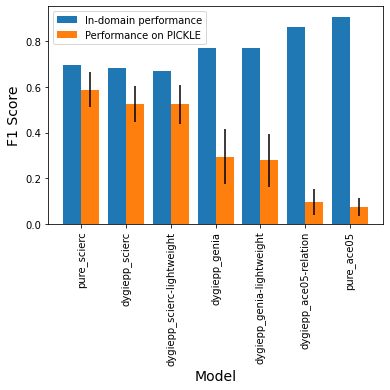

In [74]:
X_axis = np.arange(len(all_perf.index))

plt.bar(X_axis - 0.2, all_perf.ent_orig_perf_F1, 0.4, label = 'In-domain performance')
plt.bar(X_axis + 0.2, all_perf.ent_F1, 0.4, yerr=intervals, label = 'Performance on PICKLE')

plt.xticks(ticks=X_axis, labels=all_perf.index, rotation=90)
plt.xlabel("Model", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)
plt.legend()
plt.savefig('../data/straying_off_topic_data/model_performance/paper_fig4_ents_w_errorbars.png', bbox_inches='tight')

### Recall
PURE reports precision and recall values for their pretrained models, but DyGIE++ does not. Adding the recall & precision for PURE here, will put 0 for dygiepp and indicate in the figure legend that 0 means there was no statistic reported.

In [37]:
pure_ent_prec = {'pure_ace05':0.911,
                 'pure_scierc':0.676,
                 'dygiepp_scierc':0,
                 'dygiepp_scierc-lightweight':0,
                 'dygiepp_genia':0,
                 'dygiepp_genia-lightweight':0,
                 'dygiepp_ace05-relation':0
                }
pure_ent_rec = {'pure_ace05':0.906,
                'pure_scierc':0.714,
                'dygiepp_scierc':0,
                'dygiepp_scierc-lightweight':0,
                'dygiepp_genia':0,
                'dygiepp_genia-lightweight':0,
                'dygiepp_ace05-relation':0
               }

In [41]:
ent_orig_perf_prec = pd.DataFrame.from_dict(pure_ent_prec, orient='index').reset_index()
ent_orig_perf_prec = ent_orig_perf_prec.rename({'index':'model_name',
                                   0:'ent_orig_perf_prec'}, axis=1)
ent_orig_perf_prec

,model_name,ent_orig_perf_prec
0,pure_ace05,0.911
1,pure_scierc,0.676
2,dygiepp_scierc,0.000
3,dygiepp_scierc-lightweight,0.000
4,dygiepp_genia,0.000
5,dygiepp_genia-lightweight,0.000
6,dygiepp_ace05-relation,0.000


In [40]:
ent_orig_perf_rec = pd.DataFrame.from_dict(pure_ent_rec, orient='index').reset_index()
ent_orig_perf_rec = ent_orig_perf_rec.rename({'index':'model_name',
                                   0:'ent_orig_perf_rec'}, axis=1)
ent_orig_perf_rec

,model_name,ent_orig_perf_rec
0,pure_ace05,0.906
1,pure_scierc,0.714
2,dygiepp_scierc,0.000
3,dygiepp_scierc-lightweight,0.000
4,dygiepp_genia,0.000
5,dygiepp_genia-lightweight,0.000
6,dygiepp_ace05-relation,0.000


In [42]:
all_perf = pd.merge(all_perf, ent_orig_perf_rec, on='model_name')
all_perf = pd.merge(all_perf, ent_orig_perf_prec, on='model_name').set_index('model_name')
all_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,ent_orig_perf_F1,ent_orig_perf_rec,ent_orig_perf_prec
model_name,,,,,,,,,,,,,,,,,
pure_scierc,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.036920,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)",0.695,0.714,0.676
dygiepp_scierc,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)",0.685,0.000,0.000
dygiepp_scierc-lightweight,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)",0.672,0.000,0.000
dygiepp_genia,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN,0.771,0.000,0.000
dygiepp_genia-lightweight,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN,0.769,0.000,0.000
dygiepp_ace05-relation,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.863,0.000,0.000
pure_ace05,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.000000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.908,0.906,0.911


In [43]:
all_perf.ent_recall_CI[:3]

model_name
pure_scierc                    (0.6582328294158623, 0.720318096358461)
dygiepp_scierc                (0.5929452484208924, 0.6674917421516195)
dygiepp_scierc-lightweight    (0.5840552539849232, 0.6648429250138644)
Name: ent_recall_CI, dtype: object

In [44]:
ent_rec_intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in all_perf.ent_recall_CI]

In [45]:
ent_rec_intervals

[0.06208526694259875,
 0.07454649373072719,
 0.08078767102894124,
 0.10195206532284806,
 0.09465542113896111,
 0.03882180693526526,
 0.023873201593093182]

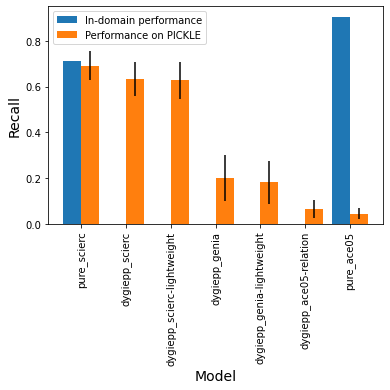

In [77]:
X_axis = np.arange(len(all_perf.index))

plt.bar(X_axis - 0.2, all_perf.ent_orig_perf_rec, 0.4, label = 'In-domain performance')
plt.bar(X_axis + 0.2, all_perf.ent_recall, 0.4, yerr=ent_rec_intervals, label = 'Performance on PICKLE')

plt.xticks(ticks=X_axis, labels=all_perf.index, rotation=90)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Recall", fontsize=14)
plt.legend()
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_recall_fig_ents_w_errorbars.png', bbox_inches='tight')

### Precision

In [34]:
all_perf.precision_CI

model_name
pure_scierc                   (0.46443731848983544, 0.5652613960627775)
dygiepp_scierc                 (0.3717627277487412, 0.4810939705318463)
dygiepp_scierc-lightweight     (0.3813013411382459, 0.4768227983241101)
dygiepp_genia                   (0.430181510756193, 0.5976599371300825)
dygiepp_genia-lightweight     (0.48348543694223767, 0.6414437924110233)
dygiepp_ace05-relation              (0.127411839260419, 0.236172265625)
pure_ace05                    (0.20731265808136748, 0.3420867293911712)
Name: precision_CI, dtype: object

In [47]:
ent_prec_intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in all_perf.ent_precision_CI]

In [48]:
ent_prec_intervals

[0.1008347140013407,
 0.09683368112058682,
 0.09641329604978538,
 0.13671406197980923,
 0.13776565224599668,
 0.10494291347513951,
 0.15540785815545224]

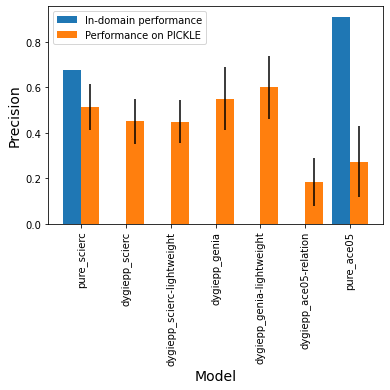

In [49]:
X_axis = np.arange(len(all_ent_perf.index))

plt.bar(X_axis - 0.2, all_perf.ent_orig_perf_prec, 0.4, label = 'In-domain performance')
plt.bar(X_axis + 0.2, all_perf.ent_precision, 0.4, yerr=ent_prec_intervals, label = 'Performance on PICKLE')

plt.xticks(ticks=X_axis, labels=all_perf.index, rotation=90)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend()
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_precision_fig_ents_w_errorbars.png', bbox_inches='tight')

## Relation performance

### Adding in original performances
Now, we want to make the same figures, but for relations. Instead of splitting up the addition of all three types of performance, I'm going to do them all in one fell swoop.

In [50]:
rel_orig_perf_F1 = {'dygiepp_scierc':0.462,
             'dygiepp_scierc-lightweight':0.467,
             'dygiepp_genia':np.nan,
             'dygiepp_genia-lightweight':np.nan,
             'dygiepp_ace05-relation':0.648,
             'pure_ace05':0.678,
             'pure_scierc':0.365
            }

In [51]:
rel_orig_perf_prec = {'dygiepp_scierc':0,
             'dygiepp_scierc-lightweight':0,
             'dygiepp_genia':np.nan,
             'dygiepp_genia-lightweight':np.nan,
             'dygiepp_ace05-relation':0,
             'pure_ace05':0.724,
             'pure_scierc':0.356
            }

In [52]:
rel_orig_perf_rec = {'dygiepp_scierc':0,
             'dygiepp_scierc-lightweight':0,
             'dygiepp_genia':np.nan,
             'dygiepp_genia-lightweight':np.nan,
             'dygiepp_ace05-relation':0,
             'pure_ace05':0.638,
             'pure_scierc':0.374
            }

In [53]:
rel_orig_perf_F1_df = pd.DataFrame.from_dict(rel_orig_perf_F1, orient='index').reset_index()
rel_orig_perf_F1_df = rel_orig_perf_F1_df.rename({'index':'model_name',
                                   0:'rel_orig_perf_F1'}, axis=1)
rel_orig_perf_F1_df

,model_name,rel_orig_perf_F1
0,dygiepp_scierc,0.462
1,dygiepp_scierc-lightweight,0.467
2,dygiepp_genia,NaN
3,dygiepp_genia-lightweight,NaN
4,dygiepp_ace05-relation,0.648
5,pure_ace05,0.678
6,pure_scierc,0.365


In [54]:
rel_orig_perf_prec_df = pd.DataFrame.from_dict(rel_orig_perf_prec, orient='index').reset_index()
rel_orig_perf_prec_df = rel_orig_perf_prec_df.rename({'index':'model_name',
                                   0:'rel_orig_perf_prec'}, axis=1)
rel_orig_perf_prec_df

,model_name,rel_orig_perf_prec
0,dygiepp_scierc,0.000
1,dygiepp_scierc-lightweight,0.000
2,dygiepp_genia,NaN
3,dygiepp_genia-lightweight,NaN
4,dygiepp_ace05-relation,0.000
5,pure_ace05,0.724
6,pure_scierc,0.356


In [55]:
rel_orig_perf_rec_df = pd.DataFrame.from_dict(rel_orig_perf_rec, orient='index').reset_index()
rel_orig_perf_rec_df = rel_orig_perf_rec_df.rename({'index':'model_name',
                                   0:'rel_orig_perf_rec'}, axis=1)
rel_orig_perf_rec_df

,model_name,rel_orig_perf_rec
0,dygiepp_scierc,0.000
1,dygiepp_scierc-lightweight,0.000
2,dygiepp_genia,NaN
3,dygiepp_genia-lightweight,NaN
4,dygiepp_ace05-relation,0.000
5,pure_ace05,0.638
6,pure_scierc,0.374


In [57]:
all_perf = pd.merge(all_perf, rel_orig_perf_F1_df, on='model_name')
all_perf = pd.merge(all_perf, rel_orig_perf_rec_df, on='model_name')
all_perf = pd.merge(all_perf, rel_orig_perf_prec_df, on='model_name').set_index('model_name')
all_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,ent_orig_perf_F1,ent_orig_perf_rec,ent_orig_perf_prec,rel_orig_perf_F1,rel_orig_perf_rec,rel_orig_perf_prec
model_name,,,,,,,,,,,,,,,,,,,,
pure_scierc,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.036920,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)",0.695,0.714,0.676,0.365,0.374,0.356
dygiepp_scierc,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)",0.685,0.000,0.000,0.462,0.000,0.000
dygiepp_scierc-lightweight,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)",0.672,0.000,0.000,0.467,0.000,0.000
dygiepp_genia,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN,0.771,0.000,0.000,NaN,NaN,NaN
dygiepp_genia-lightweight,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN,0.769,0.000,0.000,NaN,NaN,NaN
dygiepp_ace05-relation,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.863,0.000,0.000,0.648,0.000,0.000
pure_ace05,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.000000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.908,0.906,0.911,0.678,0.638,0.724


### Making figures

In [62]:
# Drop rows with no relation performance
rel_perf = all_perf.dropna()

#### F1

In [63]:
intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in rel_perf.rel_F1_CI]

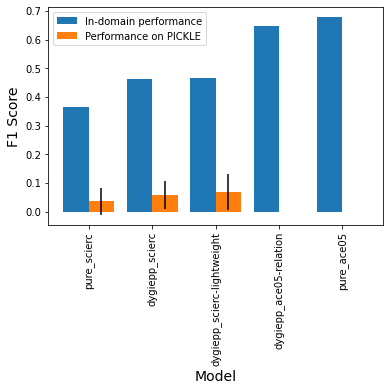

In [65]:
X_axis = np.arange(len(rel_perf.index))

plt.bar(X_axis - 0.2, rel_perf.rel_orig_perf_F1, 0.4, label = 'In-domain performance')
plt.bar(X_axis + 0.2, rel_perf.rel_F1, 0.4, yerr=intervals, label = 'Performance on PICKLE')

plt.xticks(ticks=X_axis, labels=rel_perf.index, rotation=90)
plt.ylim
plt.xlabel("Model", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)
plt.legend()
plt.savefig('../data/straying_off_topic_data/model_performance/paper_fig4_rel_F1_w_errorbars.png', bbox_inches='tight')

#### Recall

In [79]:
rel_rec_intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in rel_perf.rel_recall_CI]

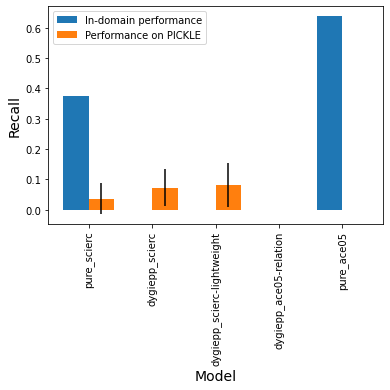

In [80]:
X_axis = np.arange(len(rel_perf.index))

plt.bar(X_axis - 0.2, rel_perf.rel_orig_perf_rec, 0.4, label = 'In-domain performance')
plt.bar(X_axis + 0.2, rel_perf.rel_recall, 0.4, yerr=rel_rec_intervals, label = 'Performance on PICKLE')

plt.xticks(ticks=X_axis, labels=rel_perf.index, rotation=90)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Recall", fontsize=14)
plt.legend()
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_recall_fig_rels_w_errorbars.png', bbox_inches='tight')

#### Precision

In [76]:
rel_prec_intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in rel_perf.rel_precision_CI]

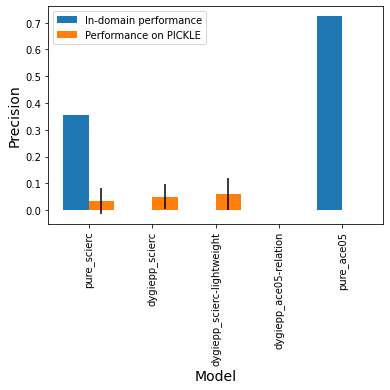

In [78]:
X_axis = np.arange(len(rel_perf.index))

plt.bar(X_axis - 0.2, rel_perf.rel_orig_perf_prec, 0.4, label = 'In-domain performance')
plt.bar(X_axis + 0.2, rel_perf.rel_precision, 0.4, yerr=rel_prec_intervals, label = 'Performance on PICKLE')

plt.xticks(ticks=X_axis, labels=rel_perf.index, rotation=90)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend()
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_precision_fig_rels_w_errorbars.png', bbox_inches='tight')